In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/weatherDecisionTree.csv")
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [ ]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
data.isnull().any().any()

True

In [ ]:
data.isnull().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [ ]:
data[data.isnull().any(axis = 1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


In [ ]:
del data['number']
data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
before_rows = data.shape[0]
data = data.dropna()
after_rows = data.shape[0]

In [ ]:
print("The number of dropped rows are {}".format(before_rows - after_rows))

The number of dropped rows are 31


In [ ]:
clean_data = data.copy() # New data frame to avoid confusion
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99) * 1
print(clean_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


In [ ]:
y = clean_data[['high_humidity_label']].copy()
y

,high_humidity_label
0,1
1,0
2,0
3,0
4,1
...,...
1090,1
1091,1
1092,1
1093,1


In [ ]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [ ]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [ ]:
time = '9am'
features = list(clean_data.columns[clean_data.columns.str.contains(time)])

# we do not need relative humidity at 9am
features.remove('relative_humidity_9am')

features

['air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am']

In [ ]:
X = clean_data[features].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 324)

In [ ]:
y_train.describe()

,high_humidity_label
count,712.000000
mean,0.494382
std,0.500320
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
X_train.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,918.913897,65.194366,142.123330,5.568288,147.789373,7.089629,0.202399,282.884615
std,3.147923,11.210412,68.773699,4.467828,67.186609,5.486311,1.628988,1584.404987
min,907.990000,36.752000,15.500000,0.782929,31.800000,1.185578,0.000000,0.000000
25%,916.727792,57.375500,65.282862,2.304048,75.978656,3.168182,0.000000,0.000000
50%,919.000000,65.967556,166.225018,3.958486,176.800000,5.077854,0.000000,0.000000
75%,921.134993,73.908500,190.500000,7.504934,201.400000,9.104346,0.000000,0.000000
max,929.320000,91.112000,343.400000,21.541732,299.200000,26.351153,24.020000,17704.000000


In [ ]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

In [ ]:
predictions = humidity_classifier.predict(X_test)
type(predictions)

numpy.ndarray

In [ ]:
predictions[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
y_test[['high_humidity_label']][:10]

,high_humidity_label
456,0
845,0
693,1
259,1
723,1
224,1
300,1
442,0
585,1
1057,1


In [ ]:
result_df = pd.DataFrame({'y_test': y_test['high_humidity_label'][:10].values,
                          'predictions': predictions[:10]})

# Afficher le DataFrame
print(result_df)

   y_test  predictions
0       0            0
1       0            0
2       1            1
3       1            1
4       1            1
5       1            1
6       1            0
7       0            0
8       1            0
9       1            1


In [ ]:
accuracy = accuracy_score(y_test, y_pred=predictions)
print(accuracy)

0.8153409090909091


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred = predictions)
print(mse)

0.1846590909090909


## **Les** **Graphes 1** **:** Decision Tree

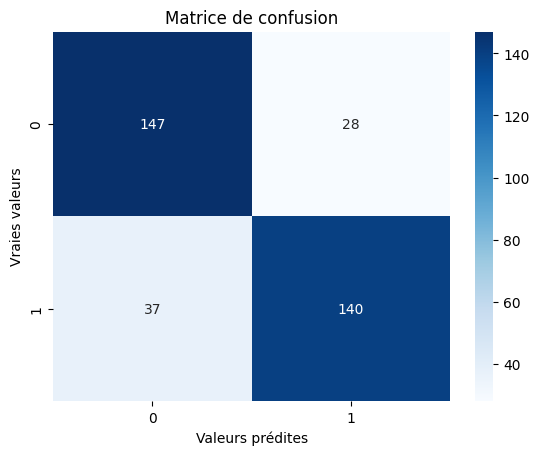

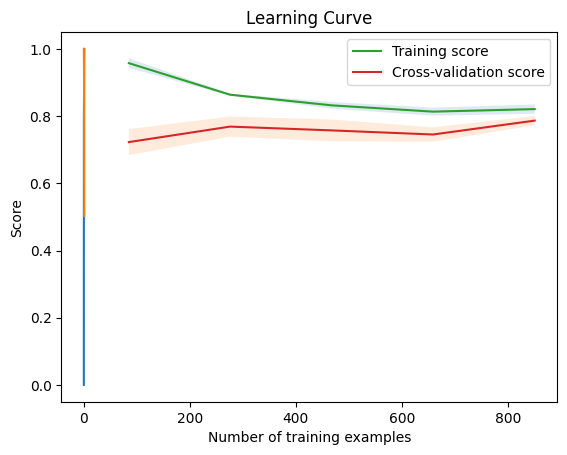

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)

# Tracer la matrice de confusion avec seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valeurs prédites')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Plotting the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, predictions)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Plotting the learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(humidity_classifier, X, y)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()

plt.show()


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Step 2: Create an instance of RandomForestClassifier
random_forest = RandomForestClassifier()

# Step 3: Fit the model to your training data
random_forest.fit(X_train, y_train)

# Step 4: Use the trained model to make predictions on your test data
predictionsRFC = random_forest.predict(X_test)

<ipython-input-44-915ccf994c19>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


In [ ]:
result_df = pd.DataFrame({'y_test': y_test['high_humidity_label'][:10].values,
                          'predictions': predictionsRFC[:10]})

# Afficher le DataFrame
print(result_df)

   y_test  predictions
0       0            0
1       0            0
2       1            1
3       1            1
4       1            1
5       1            1
6       1            1
7       0            0
8       1            1
9       1            1


In [ ]:
accuracy_score(y_test, y_pred = predictionsRFC)

0.875

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred = predictionsRFC)

0.125

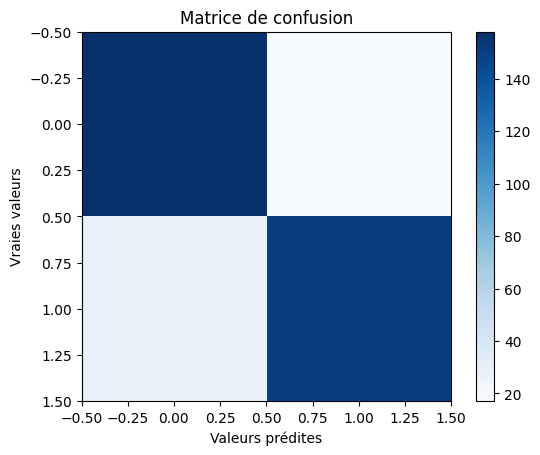

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictionsRFC)

# Afficher la matrice de confusion avec matplotlib
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
plt.xlabel('Valeurs prédites')
plt.ylabel('Vraies valeurs')
plt.show()
